<a href="https://colab.research.google.com/github/joooser/DStemplates/blob/main/C%C3%A1lculo_de_intervalo_de_confianza_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importamos las librerías necesarias para el análisis

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy.stats as st

#### Esta práctica la haremos sobre una distribución creada por nosotros

In [2]:
np.random.seed(20) 
var1 = np.random.randint(0, 10, 10) # Días de vacaciones
var2 = var1+np.random.normal(0, 1, 10) # Dinero gastado

In [3]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5])

In [4]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

#### Visualización de resultados con un intervalo de confianza del 80%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


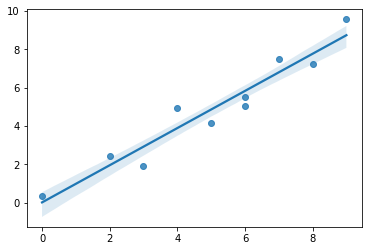

In [5]:
grafico = sns.regplot(var1, var2, ci=80)

In [6]:
# Unimos las variables var1 y var2 (estamos creando un tuple) a partir de zip
tuple = list(zip(var1, var2))
tuple

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [7]:
# Transformamos el tuple a un data frame a partir de DataFrame
tabla = pd.DataFrame(tuple,
                  columns = ['Días_vacaciones', 'Dinero_gastado'])
tabla

,Días_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [8]:
# Calcula los intervalos de confianza a un 95% para ambas variables
st.t.interval(alpha=0.95, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla)) 

(array([3.00496491, 2.84767315]), array([6.99503509, 6.86053259]))